In [2]:
"""
In order to run the code as is, you will need scipy, pandas and tqdm installed 
(although tqdm is only needed for the progress bar, and pandas is only for the autocorrelation function)
All of these can be installed (on linux) from the command interface using 'pip'
""" 

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from gibbsrank import gibbs_sample
from eprank import eprank
import pandas as pd
from cw2 import sorted_barplot

In [3]:
import seaborn as sns

sns.set(rc={'figure.figsize':(14,8.27)})

We first need to load the data, stored in "tennis_data.mat". The data consists of an array, $W$ containing the names of each player, and an array, G, containing the results of all of the matches in the season. 

In [4]:
# set seed for reproducibility
np.random.seed(0)
# load data
data = sio.loadmat('tennis_data.mat')
# Array containing the names of each player
W = data['W']
# loop over array to format more nicely
for i, player in enumerate(W):
    W[i] = player[0]
# Array of size num_games x 2. The first entry in each row is the winner of game i, the second is the loser
G = data['G'] - 1
# Number of players
M = W.shape[0]
# Number of Games
N = G.shape[0]

# Gibbs sampling (This may take a minute)

In [5]:
# number of iterations
num_iters = 1100
# perform gibbs sampling, skill samples is an num_players x num_samples array
skill_samples = gibbs_sample(G, M, num_iters)#, random_nums)


<Figure size 2000x1000 with 0 Axes>

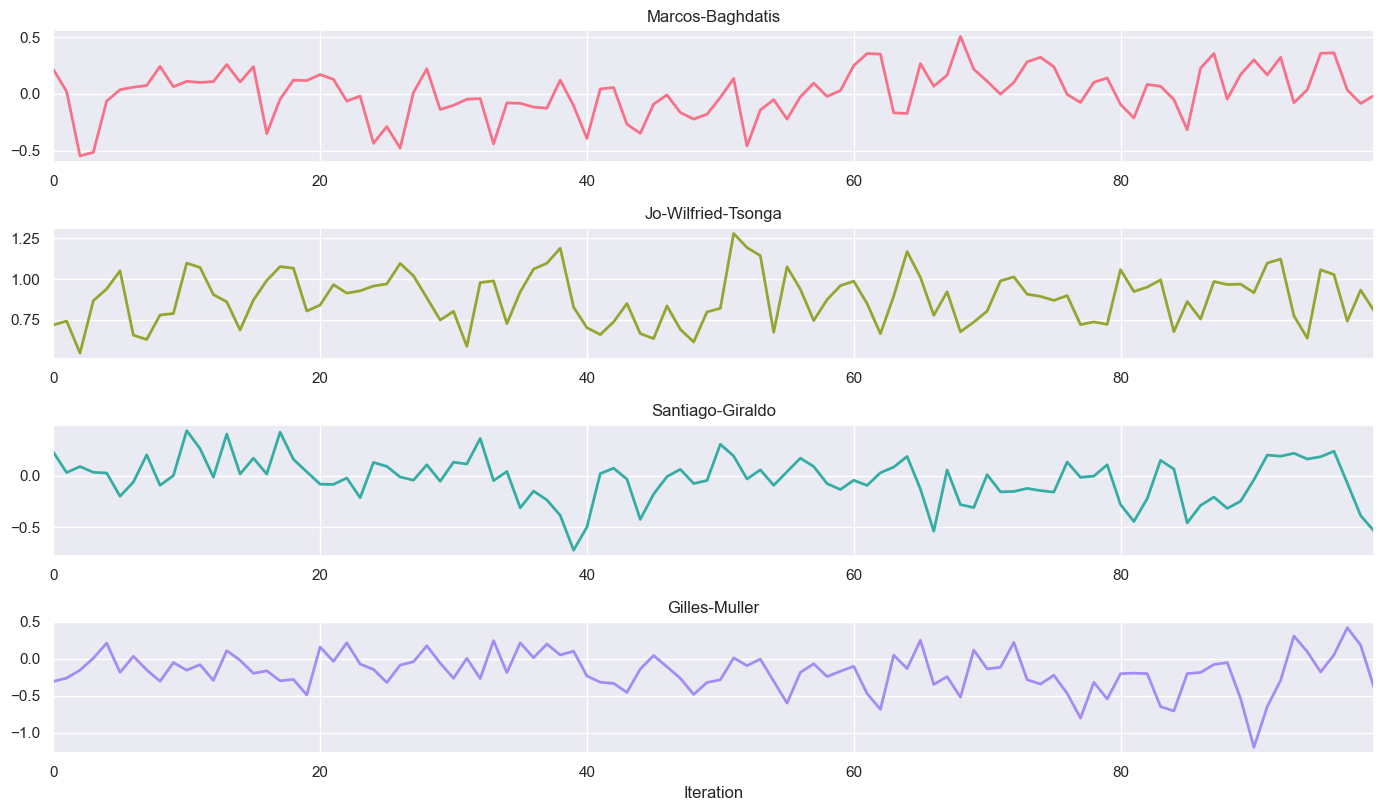

In [6]:
# Code for plotting player skill

#sns.set_palette('husl')
plt.figure(figsize=(20,10))
show_n_players=4
fig, axes = plt.subplots(show_n_players)
show_n_steps = 100
players = np.random.choice(np.arange(30), size=show_n_players, replace=False)
for i in range(show_n_players):
    axes[i].plot(np.arange(show_n_steps), skill_samples[players[i], :show_n_steps].T, label=W[i, 0],
            color=sns.color_palette('husl', 4)[i], linewidth=2.0);
    axes[i].set_xlim(0, show_n_steps - 1);
    axes[i].set_title(W[players[i],0]);
plt.xlabel('Iteration');
fig.tight_layout()



(0.0, 39.0)

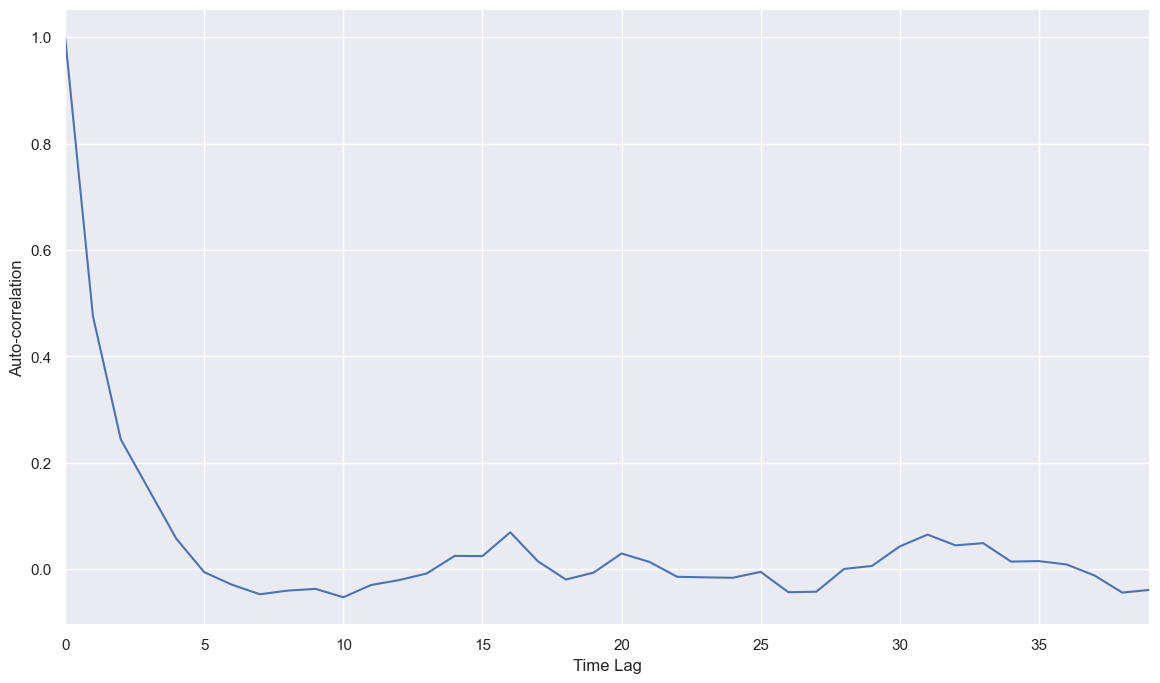

In [7]:
# Better code for plotting autocorrelation function for player p

plt.figure(figsize=(14,8))
show_n_steps = 40
p = 0
autocor = np.zeros(show_n_steps)
for i in range(show_n_steps):
    autocor[i]=pd.Series.autocorr(pd.Series(skill_samples[p,:]),lag=i)
plt.plot(autocor);
plt.xlabel('Time Lag');
plt.ylabel('Auto-correlation')
plt.xlim(0, 39)

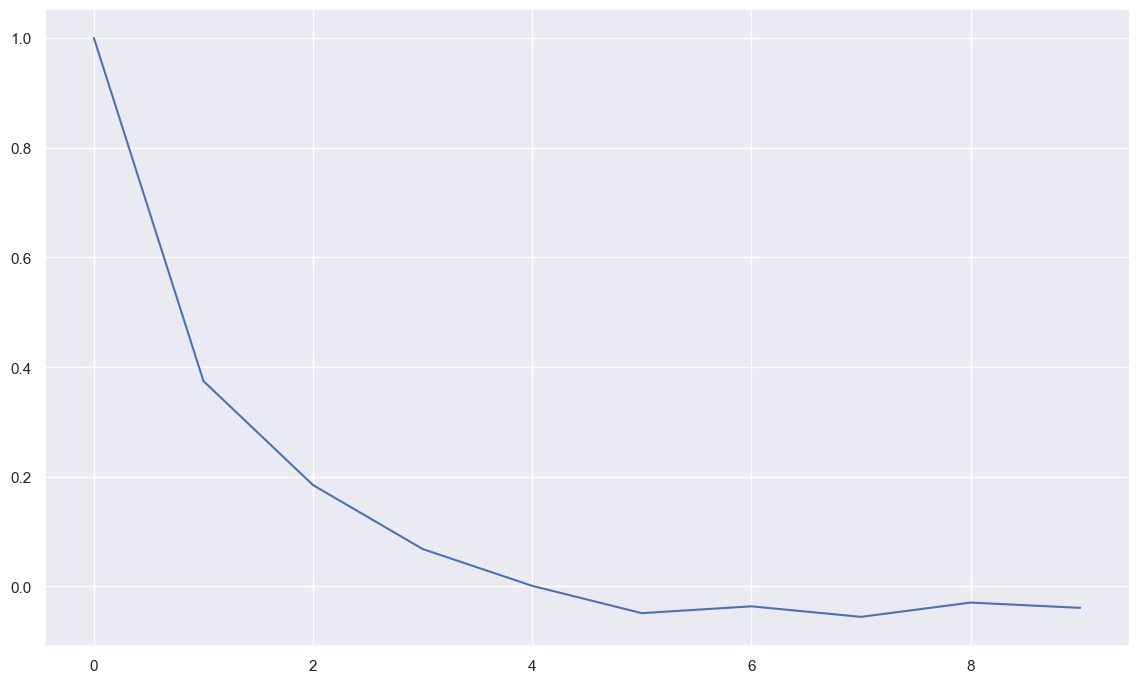

In [8]:
# Code for plotting the autocorrelation function for player p
p = 14
autocor = np.zeros(10)
for i in range(10):
    autocor[i]=pd.Series.autocorr(pd.Series(skill_samples[p,:]),lag=i)
plt.plot(autocor)

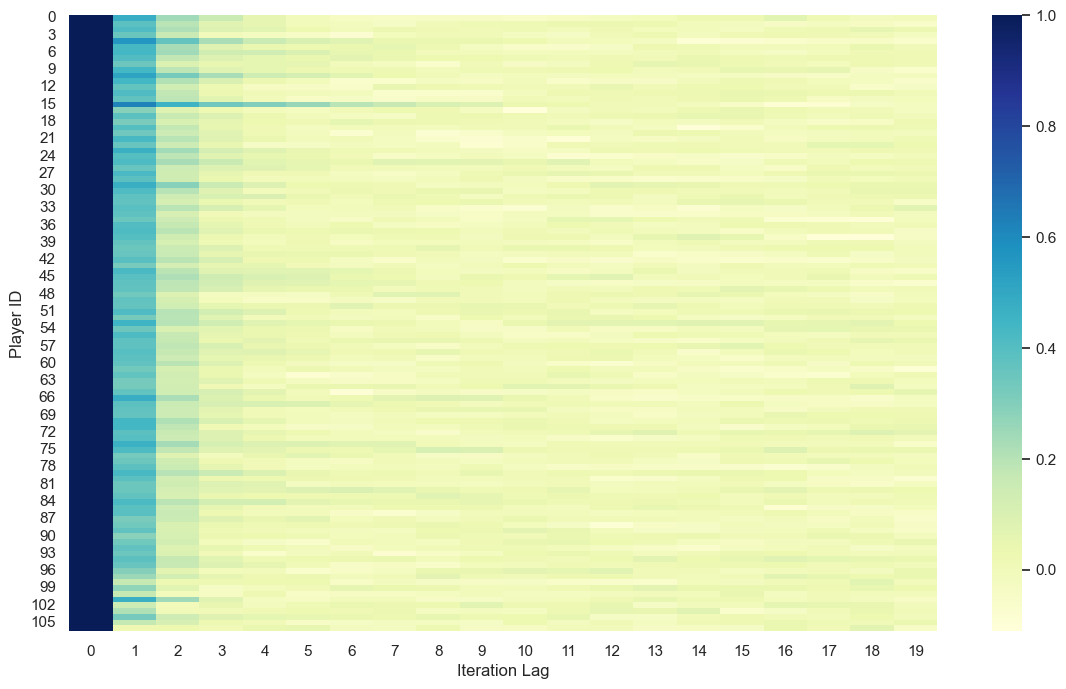

In [9]:
# Calculate autocorrelation for all players
show_n_steps = 20
autocor = np.zeros([W.shape[0], show_n_steps])
for player_id in range(W.shape[0]):
    for i in range(show_n_steps):
        autocor[player_id, i]=pd.Series.autocorr(pd.Series(skill_samples[player_id,:]),lag=i)
plt.figure(figsize=(14,8))

ax = sns.heatmap(autocor, vmax=1, cmap="YlGnBu")
ax.set_xlabel('Iteration Lag')
ax.set_ylabel('Player ID');

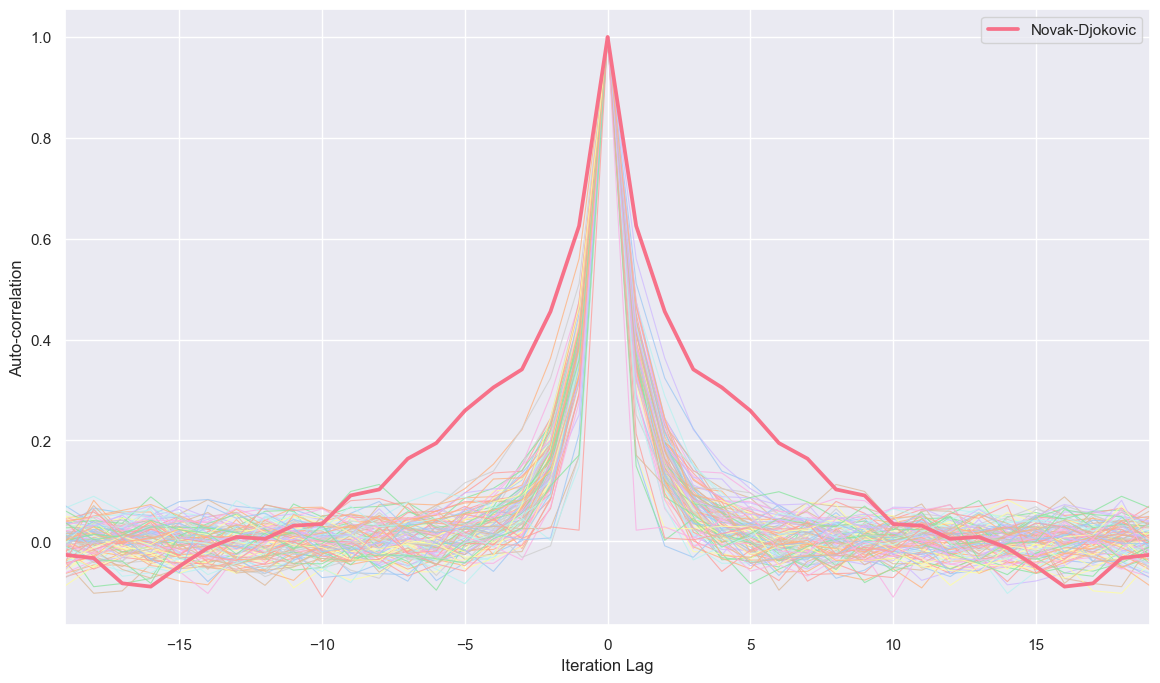

In [10]:
plt.figure(figsize=(14,8))
show_n_steps = 20
sns.set_palette('pastel')
plt.plot(np.arange(show_n_steps), autocor.T, alpha=0.8, linewidth=0.8);
plt.plot(np.arange(show_n_steps), autocor[15], alpha=1.0, linewidth=2.7, color=sns.color_palette('husl', 4)[0],
        label=W[15, 0]);
plt.plot(-np.arange(show_n_steps), autocor.T, alpha=0.8, linewidth=0.8);
plt.plot(-np.arange(show_n_steps), autocor[15], alpha=1.0, linewidth=2.7, color=sns.color_palette('husl', 4)[0]);
plt.xlabel('Iteration Lag')
plt.ylabel('Auto-correlation');
plt.xlim(1-show_n_steps, show_n_steps-1);
plt.legend()

Text(0.5, 0, 'Iteration')

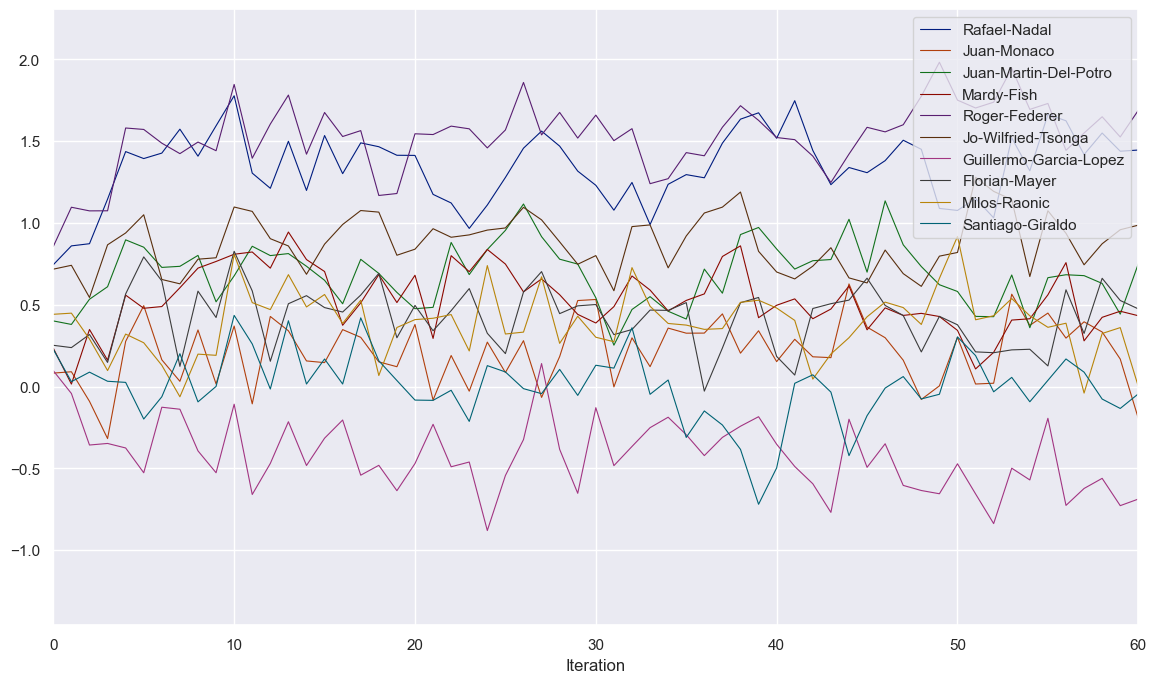

In [11]:
sns.set_palette('dark')
plt.figure(figsize=(14,8))
show_n_players = 10
for player_id in range(show_n_players):
    plt.plot(np.arange(num_iters), skill_samples.T[:, player_id], linewidth=0.8, label=W[player_id, 0])
plt.xlim(0, 60);
plt.legend(loc='upper right');
plt.xlabel('Iteration')

# EP ranking

In [12]:
num_iters = 400
# run message passing algorithm, returns mean and precision for each player
mean_player_skills, precision_player_skills = eprank(G, M, num_iters)
mean_skills_list, precision_skills_list = [], []
for mean, precision in eprank_iter(G, N, num_iters):
    mean_skills_list.append(mean)
    precision_skills_list.append(precision)
mean_skills = np.stack(mean_skills_list, axis=0)
precision_skills = np.stack(precision_skills_list, axis=0)
# Changes in means
sns.set_palette('winter')
show_n_iter=50
plt.figure(figsize=(14,8))
plt.plot(np.arange(1, show_n_iter + 1), (mean_skills[1:] - mean_skills[:-1])[:show_n_iter], alpha=0.5, linewidth=1.0);
plt.xlim(0,show_n_iter-1);

NameError: name 'eprank_iter' is not defined

In [13]:
# Maximum change in mean and precision
sns.set_palette('pastel')
show_n_iter=200
plt.figure(figsize=(14,8))

max_mean_change = np.max(np.abs(mean_skills[1:] - mean_skills[:-1]), axis=1)
print(max_mean_change)
max_prec_change = np.max(np.abs(precision_skills[1:] - precision_skills[:-1]))

plt.plot(np.arange(1, show_n_iter + 1), max_mean_change[:show_n_iter], label='Player Skills Mean', linewidth=2.2)
plt.plot(np.arange(1, show_n_iter + 1), max_prec_change[:show_n_iter], label='Player Skills Precision', linewidth=2.2)
plt.yscale('log')
plt.xlim(1, show_n_iter)
plt.xlabel('Number iterations')
plt.ylabel('Maximum absolute change from previous step')
plt.legend();

NameError: name 'mean_skills' is not defined

<Figure size 1400x800 with 0 Axes>

In [14]:
import scipy

# Get top 4 players (by ATP) player IDs
top_4_atp = ['Novak-Djokovic', 'Rafael-Nadal', 'Roger-Federer', 'Andy-Murray']
top_4_atp_ids = []
for name in top_4_atp:
    top_4_atp_ids.append(int(np.argwhere(W[:, 0] == name)))
top_4_atp_ids = np.array(top_4_atp_ids)

top_4_means = mean_player_skills[top_4_atp_ids]
top_4_vars = precision_player_skills[top_4_atp_ids]**(-1)
mean_differences = top_4_means[:, None] -  top_4_means[None,:]
vars_sums = top_4_vars[:, None] +  top_4_vars[None,:]

prob_has_better_skill = 1.0 - scipy.stats.norm.cdf(0, mean_differences, vars_sums**0.5)
prob_win = 1.0 - scipy.stats.norm.cdf(0, mean_differences, (vars_sums + 1.0)**0.5)
print(prob_has_better_skill)

[[0.5        0.93982214 0.90888525 0.9853215 ]
 [0.06017786 0.5        0.42717033 0.76651864]
 [0.09111475 0.57282967 0.5        0.81083534]
 [0.0146785  0.23348136 0.18916466 0.5       ]]


In [28]:
skill_samples_burned_in = skill_samples[:, 100:]
skill_samples_df = pd.DataFrame({W[i, 0]: skill_samples_burned_in[i] for i in range(W.shape[0])})
print(skill_samples_df.iloc[:,[0,4]])

(107, 1000)
     Rafael-Nadal  Roger-Federer
0        1.613276       1.897899
1        1.656044       1.930529
2        1.683436       1.657374
3        1.801590       1.648369
4        1.600094       1.104244
..            ...            ...
995      1.553615       1.839880
996      1.279111       1.564950
997      1.394768       1.632501
998      1.228391       1.674109
999      1.609358       1.468163

[1000 rows x 2 columns]


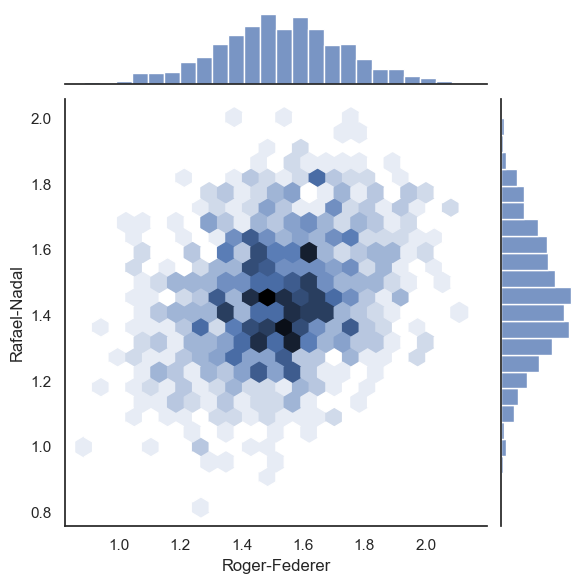

In [42]:
with sns.axes_style("white"):
    sns.jointplot(x='Roger-Federer', y='Rafael-Nadal', data=skill_samples_df, kind="hex", color="b");

In [29]:
#Marginal Gaussian

marginal_skill_means = np.mean(skill_samples_burned_in[[4, 0], :], axis=1)
marginal_skill_vars = np.var(skill_samples_burned_in[[4, 0], :], axis=1)

prob_skill_higher = 1.0 - scipy.stats.norm.cdf(0, marginal_skill_means[0] - marginal_skill_means[1], (marginal_skill_vars.sum())**0.5)
print(prob_skill_higher)

0.5966918712543187


In [30]:
#Joint Gaussian

mean = np.mean(skill_samples_burned_in[[4, 0], :], axis=1)
cov = np.cov(skill_samples_burned_in[[4, 0], :], rowvar=1)

mc_joint_gaussian_samples = np.random.multivariate_normal(mean, cov, size=100000)
prob_skill_higher = np.mean(mc_joint_gaussian_samples[:, 0] > mc_joint_gaussian_samples[:, 1])
print(prob_skill_higher)

0.61534


In [44]:
prob_higher_skill = np.zeros([4, 4])
for i in range(4):
    for j in range(4):
        player1 = top_4_atp_ids[i]
        player2 = top_4_atp_ids[j]
        prob_higher_skill[i, j] = np.mean(skill_samples_burned_in[player1, :] > skill_samples_burned_in[player2, :])
print(prob_higher_skill)

[[0.    0.957 0.934 0.989]
 [0.043 0.    0.381 0.74 ]
 [0.066 0.619 0.    0.808]
 [0.011 0.26  0.192 0.   ]]


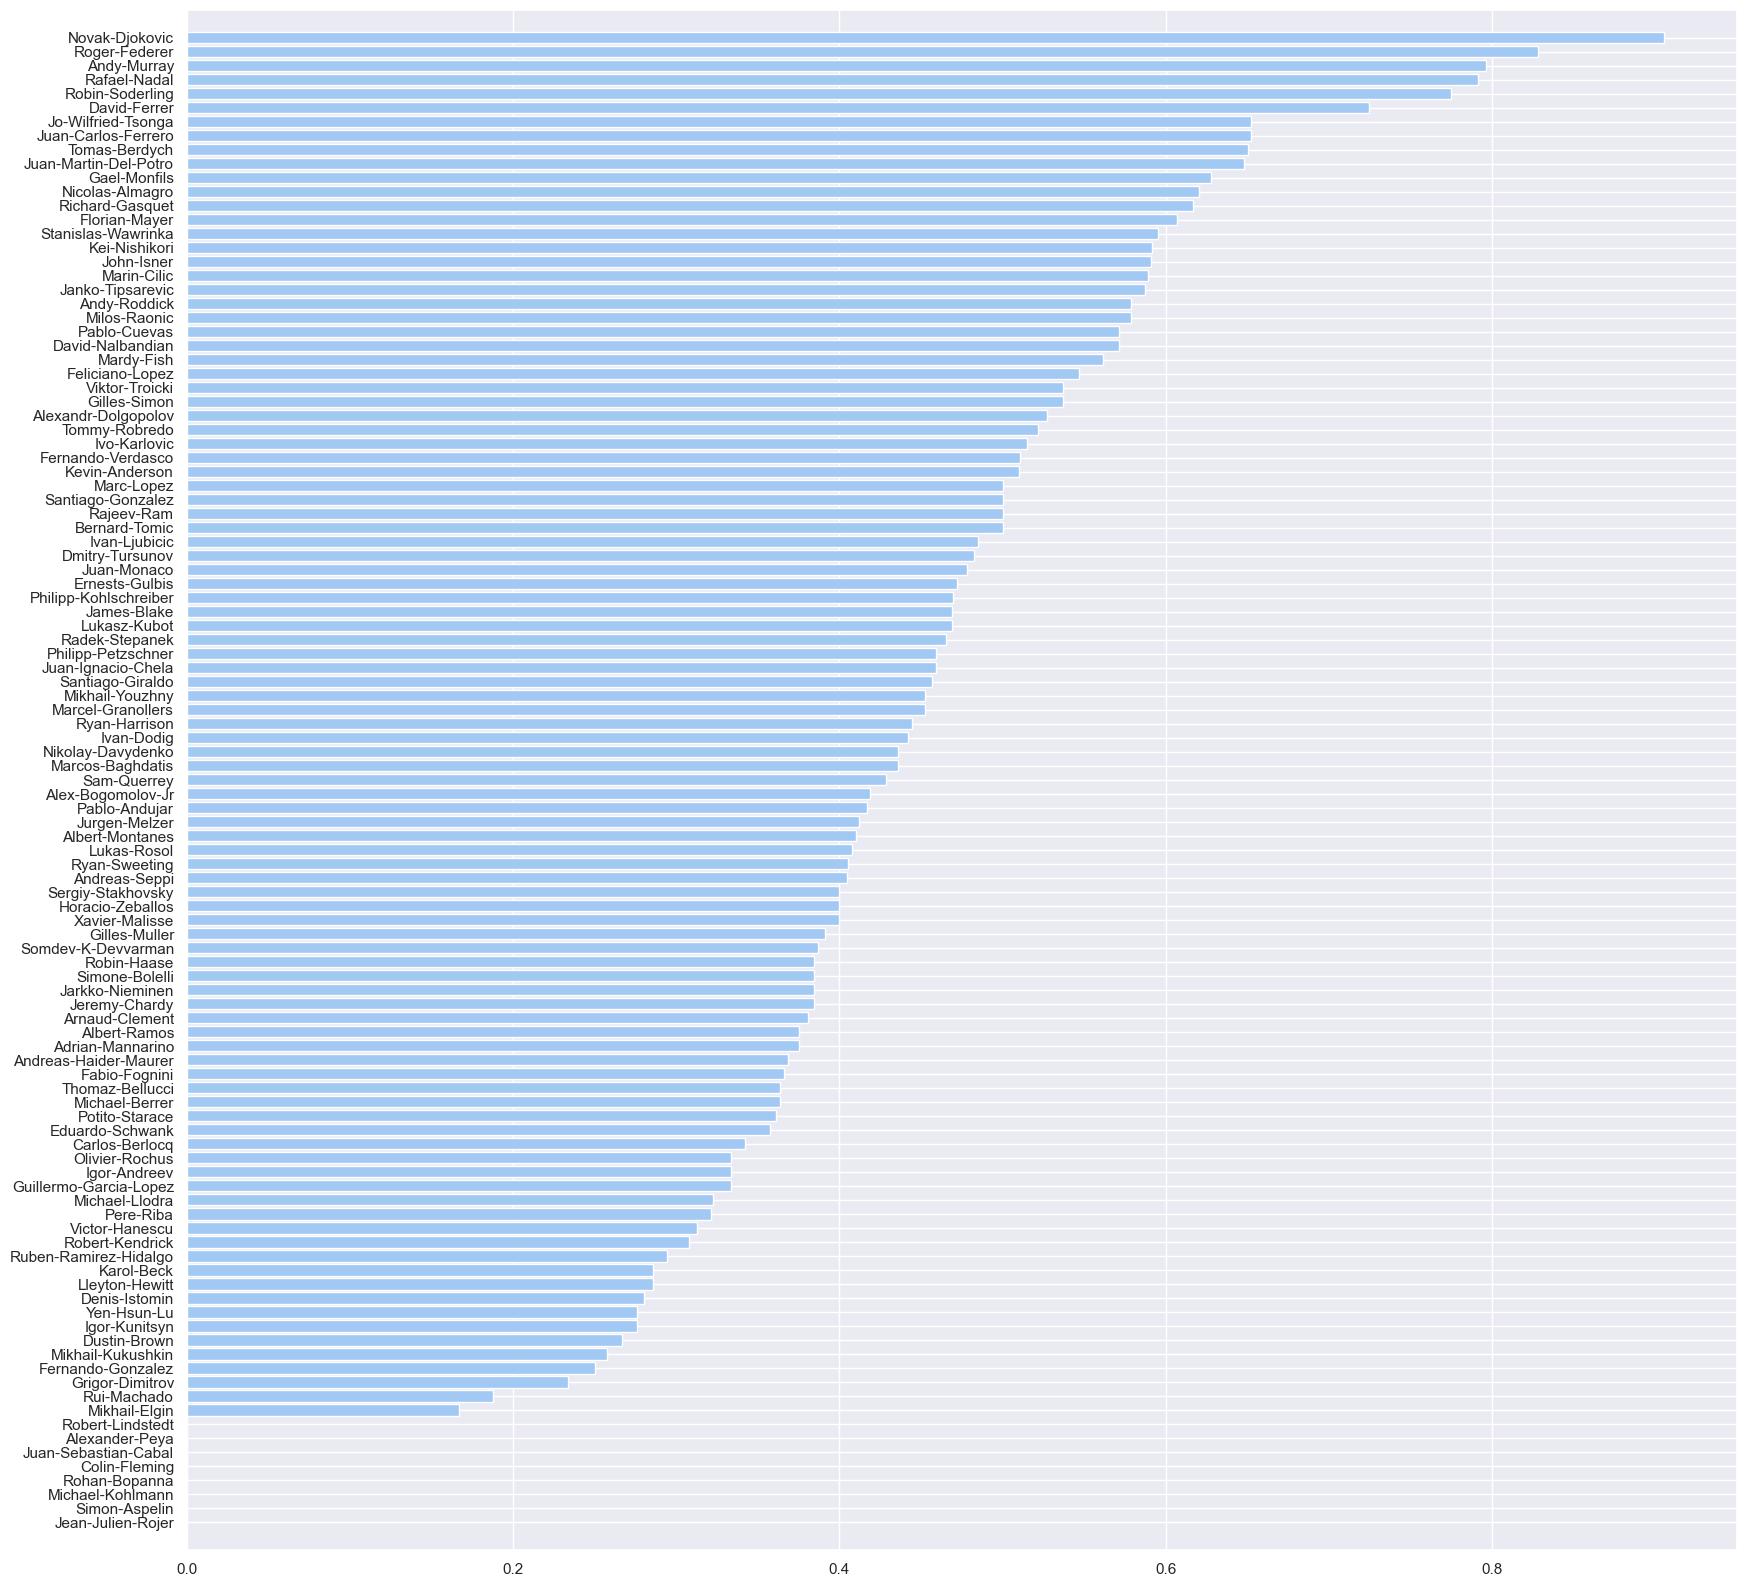

In [46]:
#Empirical Game Outcome Averages

skill_mean_gibbs = np.mean(skill_samples_burned_in, axis=1)
skill_std_gibbs = np.std(skill_samples_burned_in, axis=1)
skill_mean_mp = mean_player_skills
skill_std_mp = (1 / precision_player_skills)**0.5
frac_games_won = np.zeros(M)
for player_id in range(M):
    frac_games_won[player_id] = np.sum(G[:, 0] == player_id) / np.sum(G == player_id)
fig = sorted_barplot(frac_games_won, W)

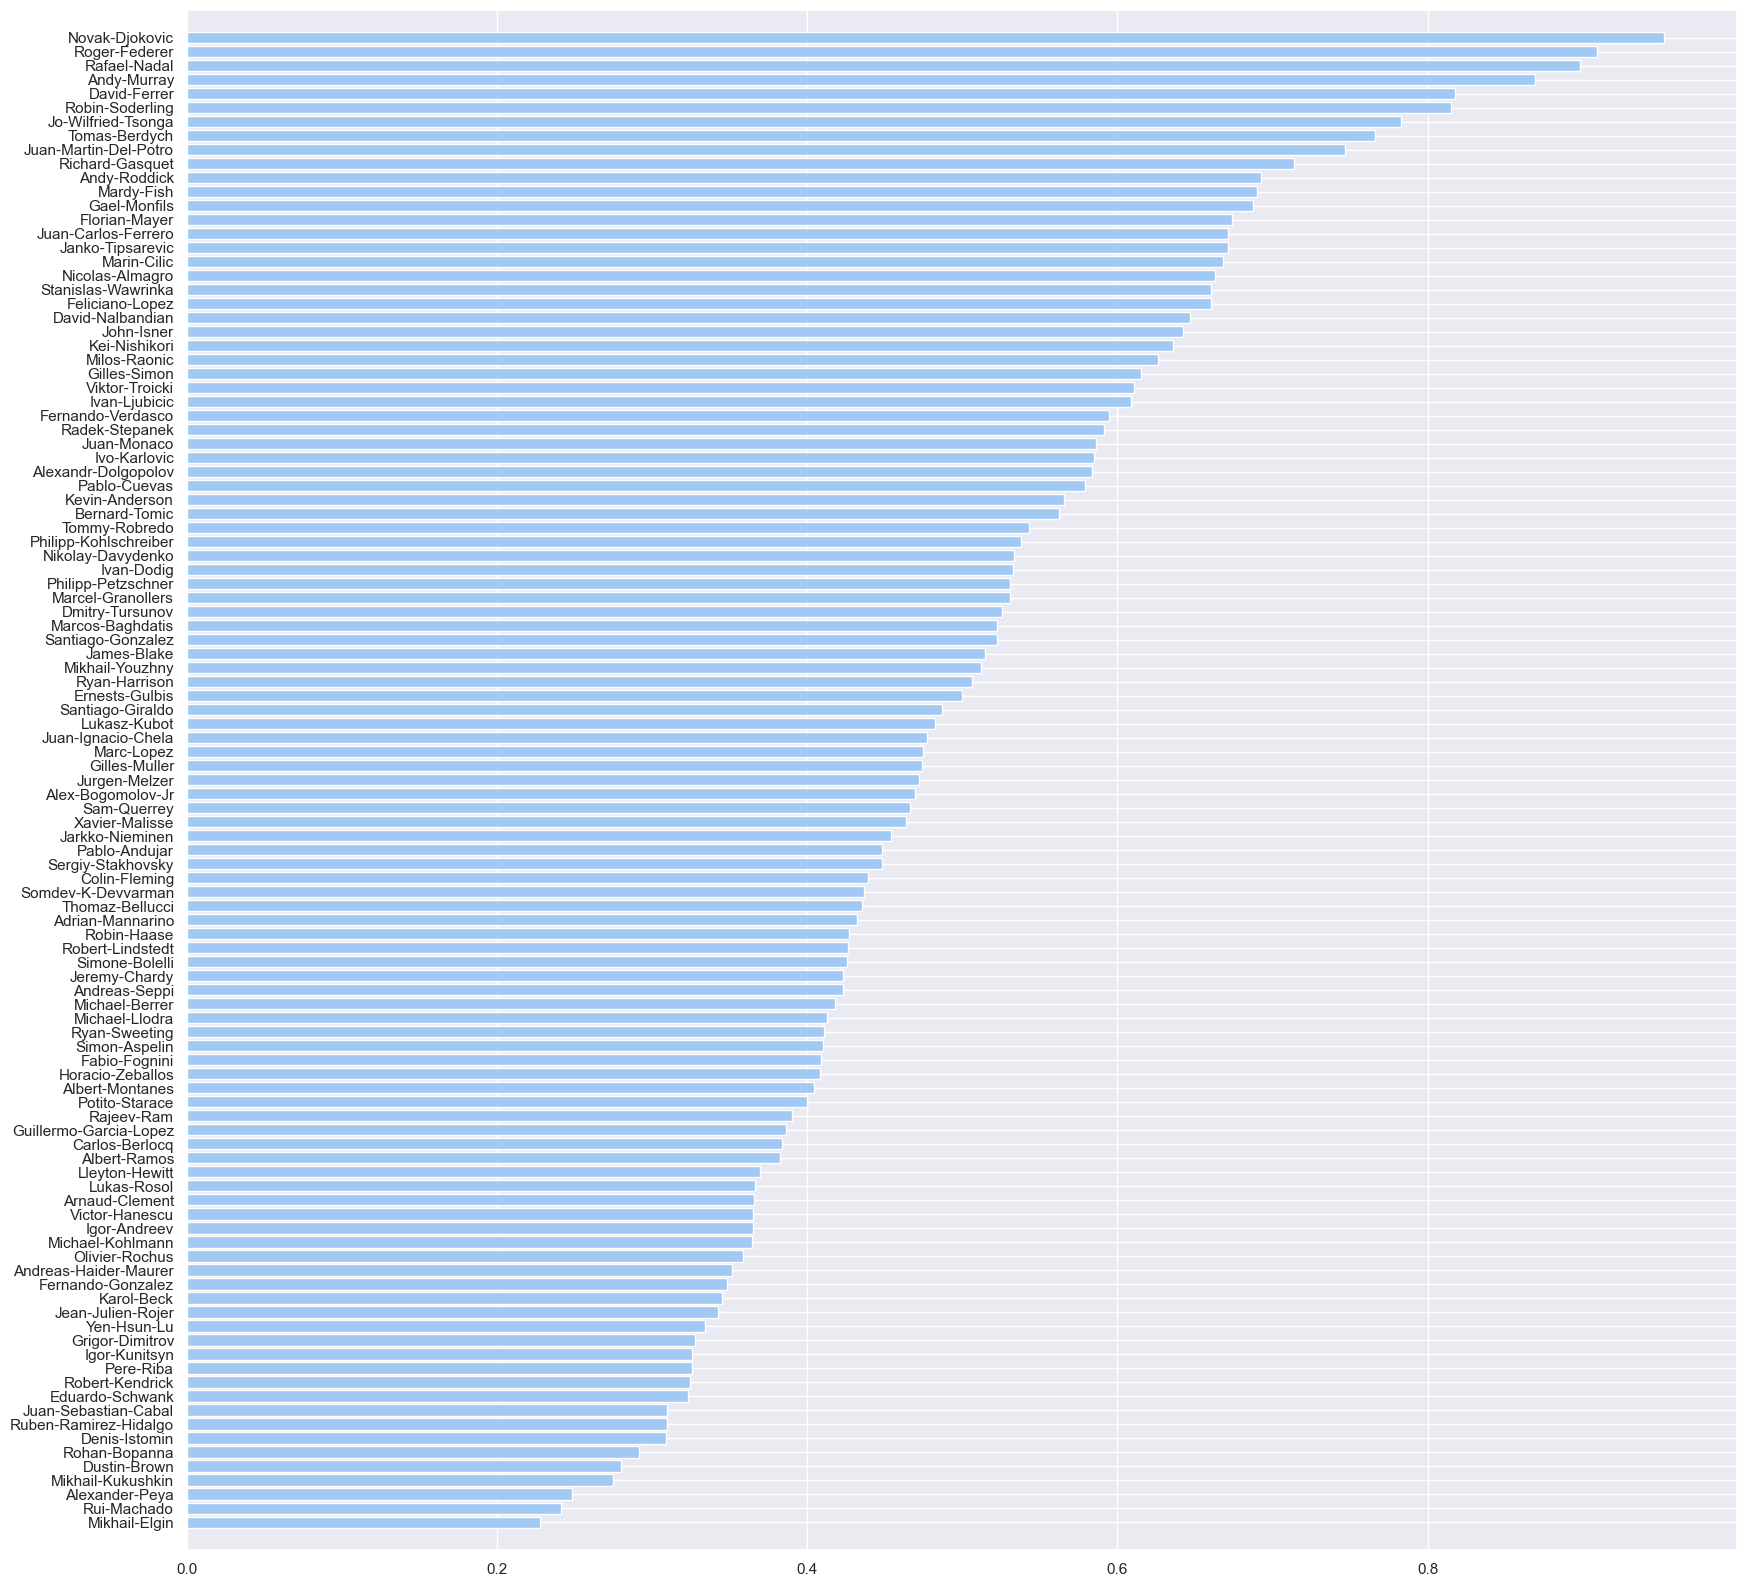

In [49]:
#Gibbs

skill_differences = skill_samples_burned_in[:, None, :] - skill_samples_burned_in[None, :, :]
prob_win_gibbs = np.mean((skill_differences + np.random.randn(skill_differences.shape[2])) > 0, axis=2)
avg_prob_win_gibbs = np.zeros(M)
for i in range(M):
    for j in range(M):
        if i != j:
            avg_prob_win_gibbs[i] += prob_win_gibbs[i, j]
avg_prob_win_gibbs /= M -1
fig = sorted_barplot(avg_prob_win_gibbs, W)


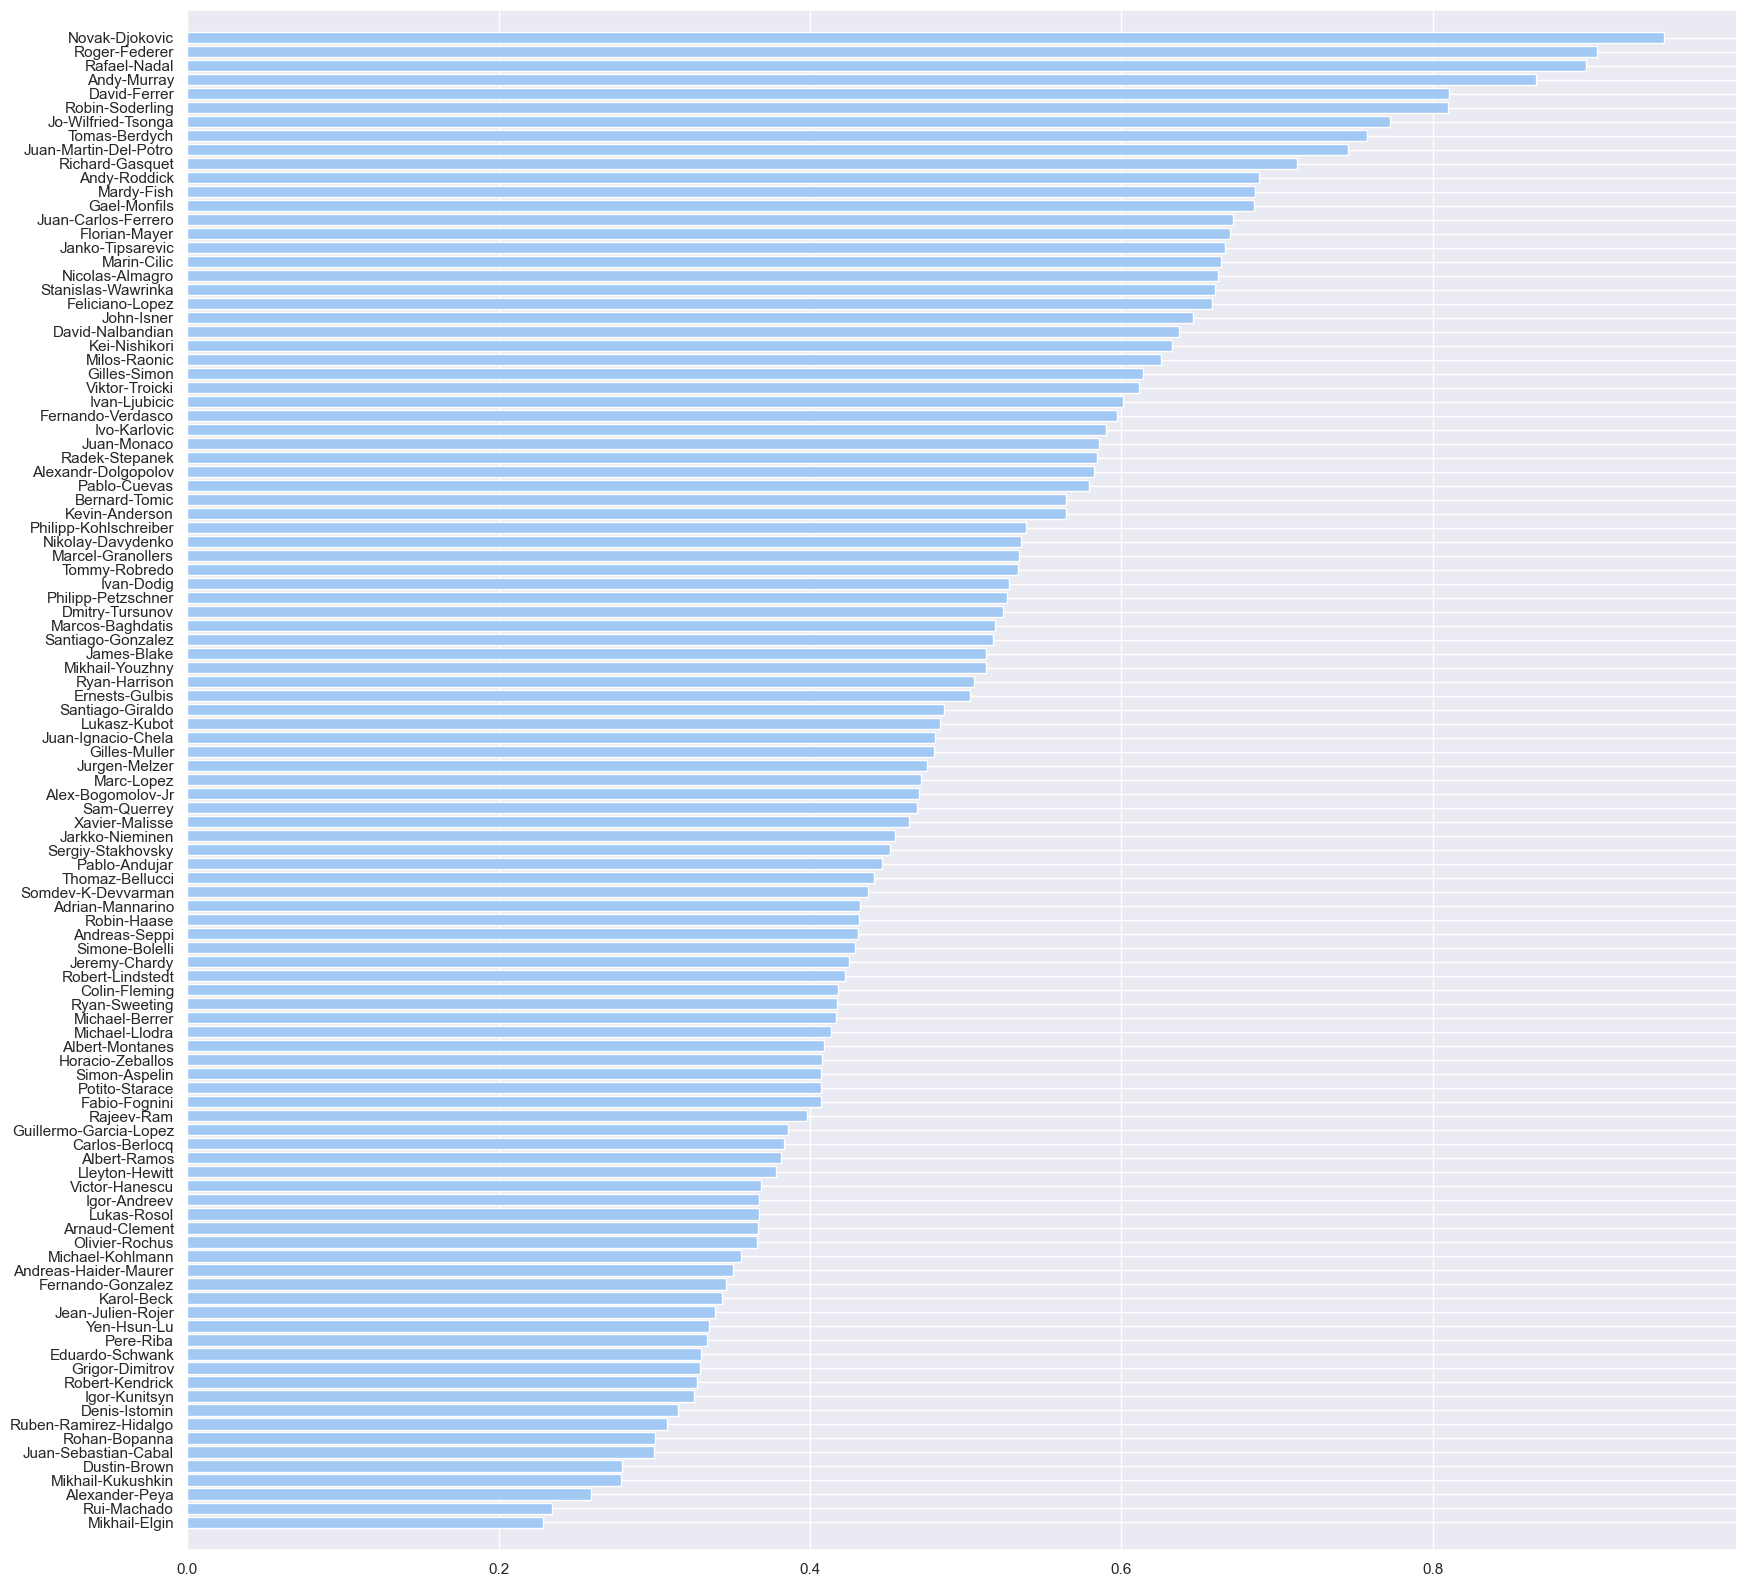

In [50]:
#MP

mean_differences = skill_mean_mp[:, None] -  skill_mean_mp[None,:]
vars_sums = skill_std_mp[:, None]**2 +  skill_std_mp[None,:]**2
prob_win_mp = 1.0 - scipy.stats.norm.cdf(0, mean_differences, (vars_sums + 1.0)**0.5)
num_players = M
avg_prob_win_mp = np.zeros(num_players)
for i in range(num_players):
    for j in range(num_players):
        if i != j:
            avg_prob_win_mp[i] += prob_win_mp[i, j]
avg_prob_win_mp /= num_players -1
fig = sorted_barplot(avg_prob_win_mp, W)


In [52]:
print(np.mean(skill_std_gibbs))
print(np.mean(skill_std_mp))

0.27061161719382193
0.26336000393631404
